In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Acquire Data

In [2]:
df = pd.read_csv('lemonade.csv')
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


## Exercises

1. Using lemonade.csv dataset and focusing on continuous variables:

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [4]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


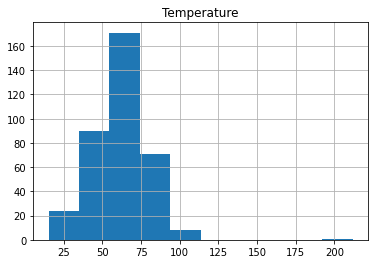

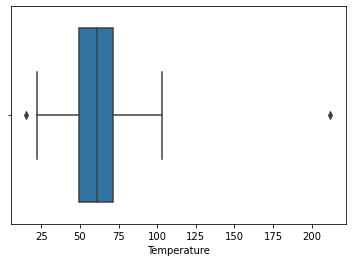

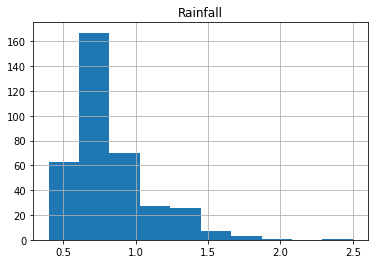

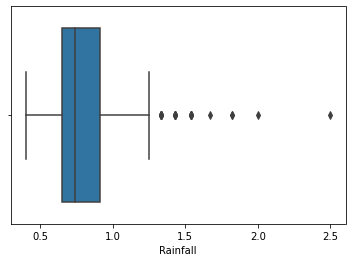

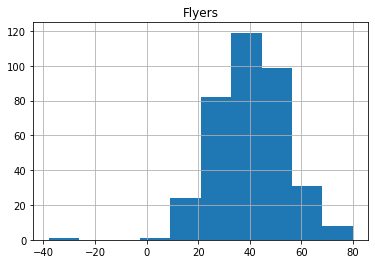

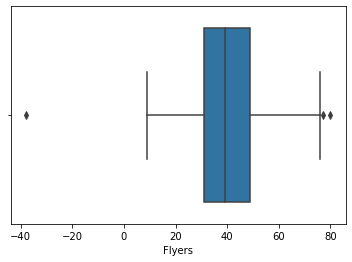

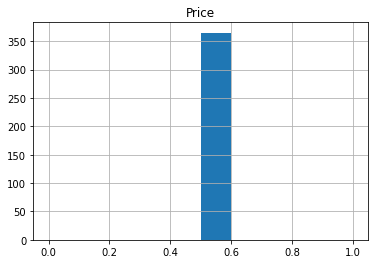

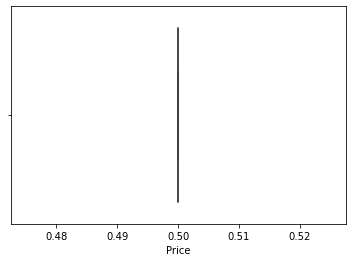

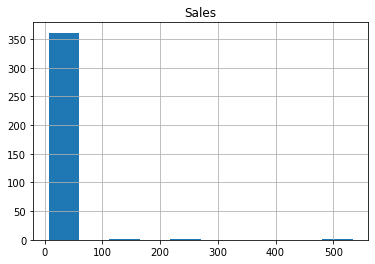

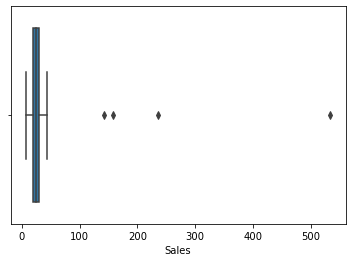

In [5]:
#Start by looking at distributions for the numeric variables
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        plt.title(col)
        plt.show()
        sns.boxplot(data=df, x=col)
        plt.show()
        

In [6]:
def get_lower_and_upper_bounds(series, multiplier = 1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - (iqr * multiplier)
    upper_bound = q3 + (iqr * multiplier)
    
    return lower_bound, upper_bound

In [17]:
#Create list with all numerical values
num_cols = df.select_dtypes('number').columns.tolist()

#Get all upper and lower bounds
for col in num_cols:
    print(f'{col}: {get_lower_and_upper_bounds(df[col])}')

Temperature: (16.700000000000003, 104.7)
Rainfall: (0.26, 1.3)
Flyers: (4.0, 76.0)
Price: (0.5, 0.5)
Sales: (5.0, 45.0)


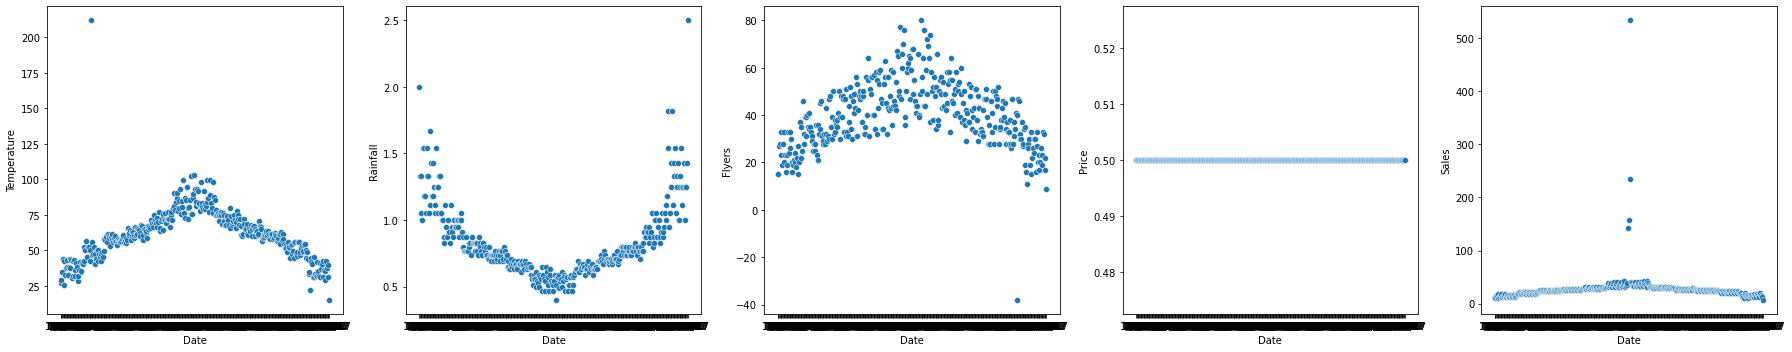

In [18]:
fig, axs = plt.subplots(1, 5, sharey=False, figsize=(25, 5))
axe = axs.ravel()
for i, col in enumerate(num_cols):
    sns.scatterplot(x=df.Date, y=df[col], ax=axe[i])
    plt.tight_layout()

In [7]:
temp_lower, temp_upper = get_lower_and_upper_bounds(df.Temperature)
df[df.Temperature < temp_lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.5,9,0.5,7


**This outlier is for temperature but 15.1 degrees does not seem unreasonable or too far outside what's normal so I'll keep this.**

In [8]:
rain_lower, rain_upper = get_lower_and_upper_bounds(df.Rainfall)
df[df.Rainfall < rain_lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


**No outliers for rainfall.**

In [9]:
flyers_lower, flyers_upper = get_lower_and_upper_bounds(df.Flyers)
df[df.Flyers < flyers_lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


**Since Flyers represents the number of physical flyers distributed and it's impossible for this number to be negative, I'll remove this data point.**

In [10]:
price_lower, price_upper = get_lower_and_upper_bounds(df.Price)
df[df.Price < price_lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


**No outliers for price.**

In [11]:
sales_lower, sales_upper = get_lower_and_upper_bounds(df.Sales)
df[df.Sales < sales_lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


**No outliers for sales.**

- Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [12]:
df[df.Temperature > temp_upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


**This is a clear outlier that has likely been imput incorrectly. This temperature is impossible unless we were on a different planet. The row should be dropped or temperature imputed for.**

In [13]:
df[df.Rainfall > rain_upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


**We've detected quite a few outliers here but none seem to be outside the realm of possibility and are likely correct values. I wouldn't want to drop them since these outliers could be valuable predictive information.**

In [14]:
df[df.Flyers > flyers_upper]


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40


**These two outliers seem well within the realm of possibility and don't seem abnormal. I would keep them.**

In [15]:
df[df.Price > price_upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


**No upper outliers for price.**

In [16]:
df[df.Sales > sales_upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


**All of the outliers here are on 4th of July weekend which was very hot with little rainfall. They sales numbers seem reasonable so I would not remove them.**

- Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [19]:
#Get all upper and lower bounds
for col in num_cols:
    print(f'{col}: {get_lower_and_upper_bounds(df[col], multiplier=3)}')

Temperature: (-16.299999999999997, 137.7)
Rainfall: (-0.13, 1.69)
Flyers: (-23.0, 103.0)
Price: (0.5, 0.5)
Sales: (-10.0, 60.0)


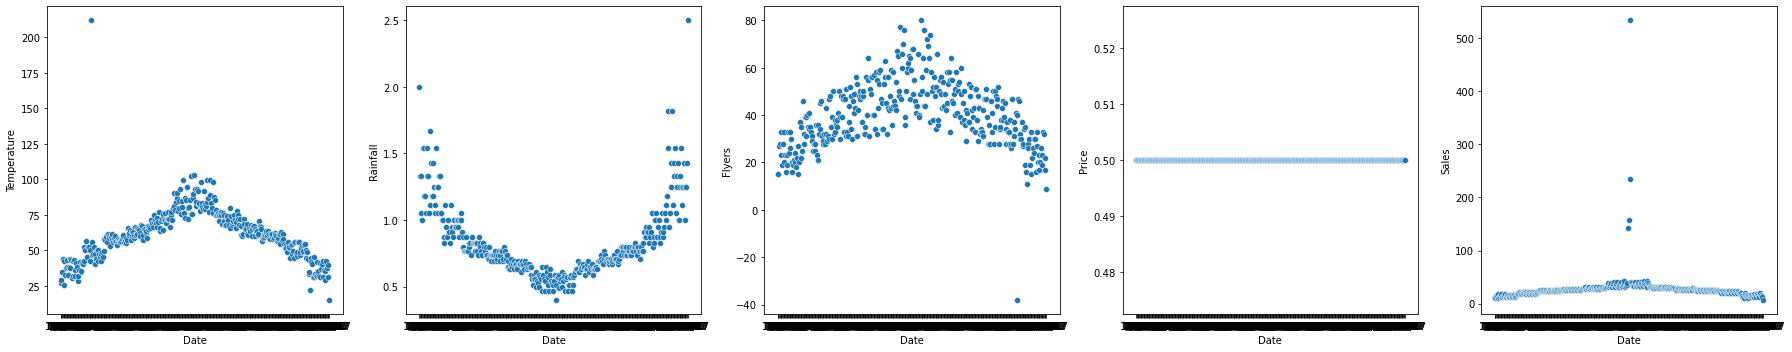

In [20]:
#Visualize the outliers
fig, axs = plt.subplots(1, 5, sharey=False, figsize=(25, 5))
axe = axs.ravel()
for i, col in enumerate(num_cols):
    sns.scatterplot(x=df.Date, y=df[col], ax=axe[i])
    plt.tight_layout()

In [21]:
temp_lower, temp_upper = get_lower_and_upper_bounds(df.Temperature, 3)
df[df.Temperature < temp_lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


**No outliers.**

In [22]:
rain_lower, rain_upper = get_lower_and_upper_bounds(df.Rainfall, 3)
df[df.Rainfall < rain_lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


**No outliers.**

In [23]:
flyers_lower, flyers_upper = get_lower_and_upper_bounds(df.Flyers, 3)
df[df.Flyers < flyers_lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


**Again, we have a negative number which is impossible. Remove this outlier.**

In [24]:
price_lower, price_upper = get_lower_and_upper_bounds(df.Price, 3)
df[df.Price < price_lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


**No outliers.**

In [25]:
sales_lower, sales_upper = get_lower_and_upper_bounds(df.Sales, 3)
df[df.Sales < sales_lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


**No outliers.**

- Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [26]:
df[df.Temperature > temp_upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


**Again, this temp is impossible and should be removed.**

In [27]:
df[df.Rainfall > rain_upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


**There are fewer outliers with this multiplier but I would still not remove them as they seem like reasonable numbers.**

In [28]:
df[df.Flyers > flyers_upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


**No outliers.**

In [29]:
df[df.Price > price_upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


**No outliers.**

In [30]:
df[df.Sales > sales_upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


**This multiplier gave us the same outliers as before. Still would not remove them.**

2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

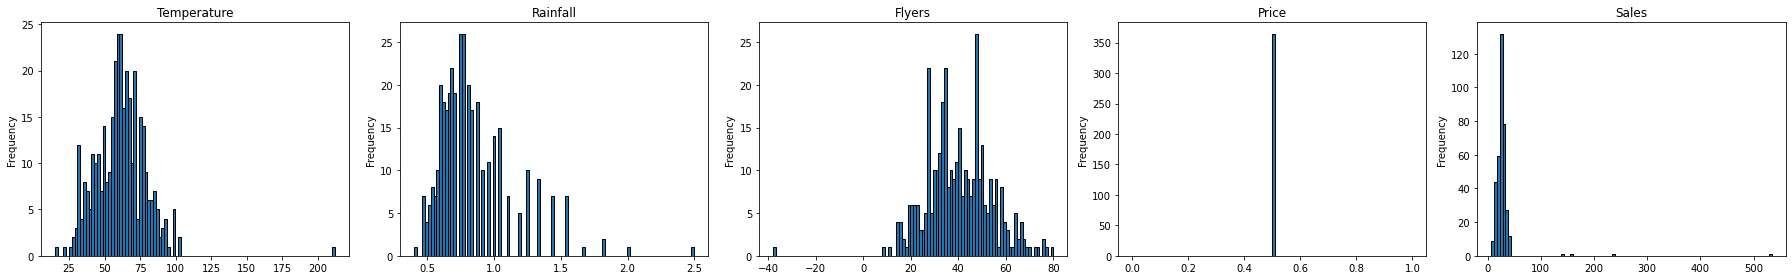

In [31]:
fig, axs = plt.subplots(1, 5, sharey=False, figsize=(25, 4))
axe = axs.ravel()
for i, c in enumerate(num_cols):
    df[c].plot.hist(ax=axe[i],title=c, ec='black', bins=100)
    plt.tight_layout()

**It seems that the only truly normally distributed columns are temperature and flyers although rainfall is close to normal.**

In [32]:
# Calculate z scores for all numerical columns
df['temp_z'] = (df.Temperature - df.Temperature.mean()) / df.Temperature.std()
df['rainfall_z'] = (df.Rainfall - df.Rainfall.mean()) / df.Rainfall.std()
df['flyers_z'] = (df.Flyers - df.Flyers.mean()) / df.Flyers.std()
df['sales_z'] = (df.Sales - df.Sales.mean()) / df.Sales.std()

- Use a 2 sigma decision rule to isolate the outliers.

    - Do these make sense?
    - Should certain outliers be kept or removed?

In [33]:
df[df['temp_z'].abs() > 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_z,rainfall_z,flyers_z,sales_z
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,8.336627,0.306792,-0.370227,-0.221847
166,6/16/17,Friday,99.3,0.47,77,0.5,41,2.105251,-1.299691,2.676244,0.424395
176,6/26/17,Monday,102.6,0.47,60,0.5,42,2.287714,-1.299691,1.443149,0.456708
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,2.304301,-1.299691,1.370614,3.720233
190,7/10/17,Monday,98.0,0.49,66,0.5,40,2.033372,-1.226669,1.878359,0.392083
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41,2.105251,-1.299691,2.603709,0.424395
202,7/22/17,Saturday,99.6,0.47,49,0.5,42,2.121838,-1.299691,0.645264,0.456708
207,7/27/17,Thursday,97.9,0.47,74,0.5,43,2.027843,-1.299691,2.458639,0.489020
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,-2.168799,3.629291,-2.111067,-0.577281
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,-2.550311,6.112037,-2.256137,-0.674217


**Apart from the previously identified 212 temp all the other outliers seem reasonable and should be kept.**

In [34]:
df[df['flyers_z'].abs() >= 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_z,rainfall_z,flyers_z,sales_z
166,6/16/17,Friday,99.3,0.47,77,0.5,41,2.105251,-1.299691,2.676244,0.424395
170,6/20/17,Tuesday,85.1,0.54,70,0.5,37,1.320109,-1.044114,2.168499,0.295147
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41,1.828792,-1.299691,2.603709,0.424395
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,1.779030,-1.153647,2.023429,4.204914
183,7/3/17,Monday,81.5,0.54,68,0.5,235,1.121058,-1.044114,2.023429,6.692948
194,7/14/17,Friday,92.0,0.50,80,0.5,40,1.701621,-1.190158,2.893849,0.392083
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41,2.105251,-1.299691,2.603709,0.424395
203,7/23/17,Sunday,89.1,0.51,72,0.5,37,1.541275,-1.153647,2.313569,0.295147
204,7/24/17,Monday,83.5,0.57,69,0.5,35,1.231642,-0.934581,2.095964,0.230523
207,7/27/17,Thursday,97.9,0.47,74,0.5,43,2.027843,-1.299691,2.458639,0.489020


**Apart from the previously identified negative value, all outliers should be kept.**

3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [36]:
df[df['temp_z'].abs() >= 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_z,rainfall_z,flyers_z,sales_z
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,8.336627,0.306792,-0.370227,-0.221847


**Again, this outlier should be removed.**

In [37]:
df[df['flyers_z'].abs() >= 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_z,rainfall_z,flyers_z,sales_z
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20,-0.786506,0.452836,-5.665283,-0.254159


**Again, this outlier should be removed.**